# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
# Your code here :
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'100% of our data: {len(data)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 506.
80% for training data: 404.
20% for test data: 102.


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
# Your code here :
training = LinearRegression()
training.fit(X_train, y_train)

LinearRegression()

In [9]:
predictions_X_test = training.predict(X_test)
predictions_X_train = training.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
# Your code here :
# Evaluate on training set

r2_train = r2_score(y_train, predictions_X_train)

# Evaluate on testing set

r2_test = r2_score(y_test, predictions_X_test)

print("Training Set: R2 =" , r2_train)
print("Testing Set: R2 =" , r2_test)

Training Set: R2 = 0.7508856358979672
Testing Set: R2 = 0.6687594935356245


## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
# Your code here :
mse_train = mean_squared_error(y_train, predictions_X_train)
mse_test = mean_squared_error(y_test, predictions_X_test)

print("Training Set: MSE =", mse_train )
print("Testing Set: MSE =", mse_test )

Training Set: MSE = 21.641412753226316
Testing Set: MSE = 24.291119474974067


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
# Your code here :
mae_train = mean_absolute_error(y_train, predictions_X_train)
mae_test= mean_absolute_error(y_test, predictions_X_test)

print("Training Set: MAE =", mae_train )
print("Testing Set: MAE =", mae_test )

Training Set: MAE = 3.3147716267832337
Testing Set: MAE = 3.1890919658879158


## Classification Model Evaluation

In [42]:
import numpy as np # operaciones matemáticas (numerical python)
import pandas as pd # manipulación de datos
import warnings # nobody likes warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [43]:
from sklearn.datasets import load_iris
data = load_iris()

In [44]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [45]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
df = pd.DataFrame(data['data'],columns=column_names)

In [47]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
target = pd.DataFrame(data.target)
target.value_counts()


0
0    50
1    50
2    50
Name: count, dtype: int64

In [49]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [71]:
data['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [52]:
# Your code here :
X = df
y = target[0]



In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'100% of our data: {len(df)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 150.
80% for training data: 120.
20% for test data: 30.


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [54]:
# Your code here :
training = LogisticRegression()
training.fit(X_train, y_train)


LogisticRegression()

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [55]:
# Your code here :
predictions_X_train = training.predict(X_train)  # Predictions on training set
predictions_X_test = training.predict(X_test)  # Predictions on testing set

In [56]:
print(f'80% for train prediction data: {len(predictions_X_train)}.')
print(f'20% for test prediction data: {len(predictions_X_test)}.')

80% for train prediction data: 120.
20% for test prediction data: 30.


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [58]:
# Your code here :
print("Classification Report for Training Set:")
print(classification_report(y_train, predictions_X_train))

print("Classification Report for Testing Set:")
print(classification_report(y_test, predictions_X_test))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [59]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train, predictions_X_train)
balanced_accuracy_test = balanced_accuracy_score(y_test, predictions_X_test)

print("Balanced Accuracy (Training):", balanced_accuracy_train)
print("Balanced Accuracy (Testing):", balanced_accuracy_test)

Balanced Accuracy (Training): 0.975609756097561
Balanced Accuracy (Testing): 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [ ]:
# Your code here :

## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
# Your code here :

## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
# Your code here :

## 13. Generate confusion matrices for both the training and the testing set.

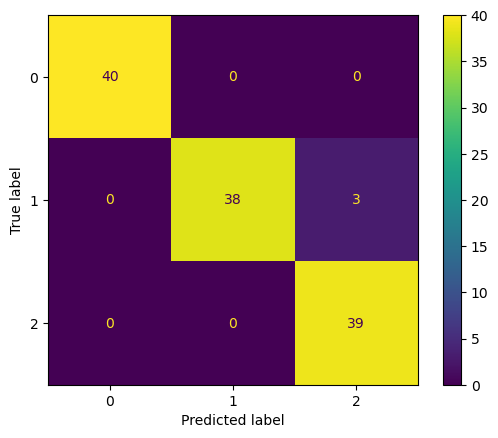

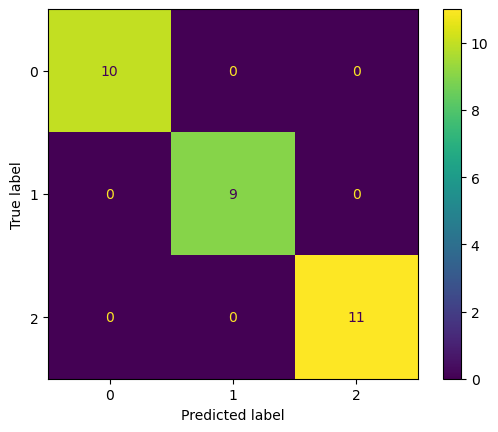

In [60]:
# Your code here :
ConfusionMatrixDisplay(confusion_matrix(y_train, predictions_X_train)).plot()

ConfusionMatrixDisplay(confusion_matrix(y_test, predictions_X_test)).plot()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [63]:
# Have fun here !
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [64]:
iris_clustered = pd.DataFrame(X_train, columns=column_names)
iris_clustered['cluster'] = kmeans.labels_
iris_clustered['target'] = y_train
iris_clustered.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
112,6.8,3.0,5.5,2.1,2,2
75,6.6,3.0,4.4,1.4,2,1
40,5.0,3.5,1.3,0.3,1,0
138,6.0,3.0,4.8,1.8,2,2
146,6.3,2.5,5.0,1.9,2,2


In [73]:
target_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_clustered['target'] = iris_clustered['target'].map(target_mapping)

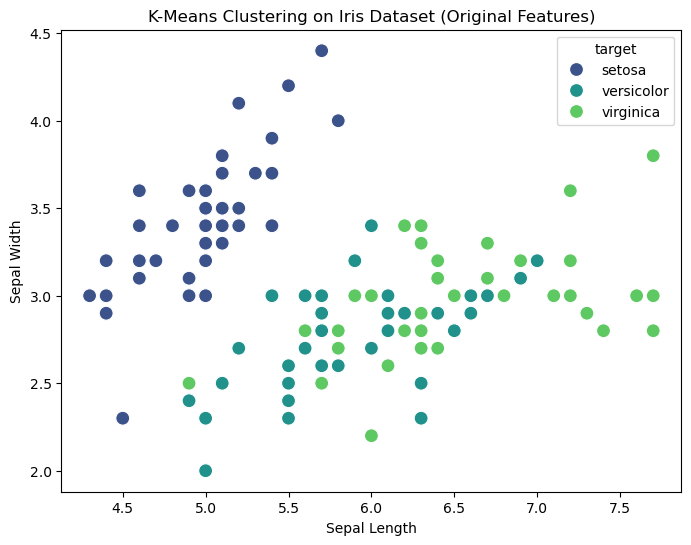

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_clustered, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis', s=100)
plt.title('K-Means Clustering on Iris Dataset (Original Features)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='target')
plt.show()